### Week 12. Scales for lumping and reliability in a multidimensional world

By Hyunsu Oh and Charlie Eaton, April 2020

1. Scales as lumping in a multidimensional world: religion and abortion
2. Scale validity, reliability, and standardization in multidimensional measurement
3. Factor analysis and splitting scale groupings
4. Regression and scale testing

### 1. Scales as lumping in a multidimensional world: religiosity and abortion

* Social beliefs, communities, and institutions are multi-dimensional
* They are hard to measure directly
* One solution is to combine multiple measures into a **multi-item scale**
* **multi-item scales** take the average of multiple standardized measures related to our object of interest
* standardized test scores such as the SAT are used ad nauseam as dependent (DV) and independent (IV) variables in the sociology of education even though they are not 1 measure, but in fact the combination of hundreds of measures per student (i.e. each student's answer to hundreds of questions)

[your notes about religiosity and abortion belief measures]

### 2. Scale validity, reliability, and standardization in multidimensional measurement

Scales need to be:

* **valid**: actually measuring social object of interest. I.e. what is relegiosity and how can it be measured?
* **reliable**: yielding consistent results across different measures of the same thing and across the same measure over time
* Cronbach's alpha is just a fancy formula showing that using larger numbers of measures with higher correlations with eachother gives us more reliability
* What are different survey questions that we could potentially combine into multi-dimensional scales about religiosity and abortion beliefs?

[your notes here about multidimensional religiosity & abortion belief questions]

* Sometimes data measuring the same thing are recorded with differnt scales that need be standardized.
* For example, survey responses to multiple dichotomous (yes/no) questions about religiosity together with 1-5 likert scale responses to other questions.
* Or we might have questions about agreement/disagreement with positive and negative statements about religion. In both cases we would need to standardize data to measure positive
* Use codebook below to examine multiple religiosity questions. How could we standardize these by recoding the likert scales for some questions?

In [1]:
%set graph_format svg

In [2]:
quietly {
set line 200
  set more off
  use age sex race educ comfort makefrnd religcon religint ///
   abdefect abnomore abhlth abpoor abrape absingle abany using gss2018w13, clear
}
codebook comfort makefrnd religcon religint



. codebook comfort makefrnd religcon religint

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
comfort                                                                                                                             religion helps people to gain comfort in times of trouble and sorrow
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (byte)
                 label:  COMFORT

                 range:  [1,5]                        units:  1
         unique values:  5                        missing .:  0/2,348
       unique mv codes:  3                       missing .*:  1,186/2,348

            tabulation:  Freq.   Numeric  Label
                

### The Stata code below does the following:
* recodes the likert scales for agreement with 2 negative statements about religion so that 5 will instead represent a positive belief about religion
* renames the variables to indicate the positive beliefs they not represent - that religion 1) promotes tolerance, 2) promotes social harmony.

In [4]:
foreach var in religcon religint {
    recode `var' (1=5) (2=4) (3=3) (4=2) (5=1), gen(no`var')
}
rename noreligint tolerant
rename noreligcon harmony


(887 differences between religcon and noreligcon)
(918 differences between religint and noreligint)




### 3. Factor analysis and splitting scale groupings

* Factor analysis elaborates correlation analysis to determine what measures should be grouped together in what scales
* Correlation matrices provide some intuition underlying factor analysis
* Which of our religion measures are correlated with eachother based on our correlation matrix in Stata?

In [5]:
pwcorr comfort makefrnd harmony tolerant, sig


             |  comfort makefrnd  harmony tolerant
-------------+------------------------------------
     comfort |   1.0000 
             |
             |
    makefrnd |   0.4399   1.0000 
             |   0.0000
             |
     harmony |   0.1005   0.0263   1.0000 
             |   0.0007   0.3759
             |
    tolerant |   0.0557   0.0319   0.4860   1.0000 
             |   0.0589   0.2806   0.0000
             |


### Answer which of the following 6 combinations of our variables are strongly or weakly correlated with eachother:

Religion:

1. Gives comfort / provides friends [strongly / weakly]
2. Gives comfort / fosters social harmony [strongly / weakly]
3. Gives comfort / fosters tolerance [strongly / weakly]
4. Provides friends / fosters social harmony [strongly / weakly]
5. Provides friends / foster tolerance [strongly / weakly]
6. Fosters tolerance / fosters social harmony [strongly / weakly]

### Factor analysis estimates **factor loadings**:

* a measure of how strongly each variable is correlated with other variables that are correlated with that unobserved factor
* Stata estimates factor loading and plots the factor loads for the top 2 unobserved factors:


(obs=1,126)

Factor analysis/correlation                      Number of obs    =      1,126
    Method: principal factors                    Retained factors =          2
    Rotation: (unrotated)                        Number of params =          6

    --------------------------------------------------------------------------
         Factor  |   Eigenvalue   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      0.80196      0.23433            0.9157       0.9157
        Factor2  |      0.56763      0.80150            0.6481       1.5638
        Factor3  |     -0.23386      0.02605           -0.2670       1.2968
        Factor4  |     -0.25992            .           -0.2968       1.0000
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  =  558.79 Prob>chi2 = 0.0000

Factor loadings (pattern matrix) and unique varianc

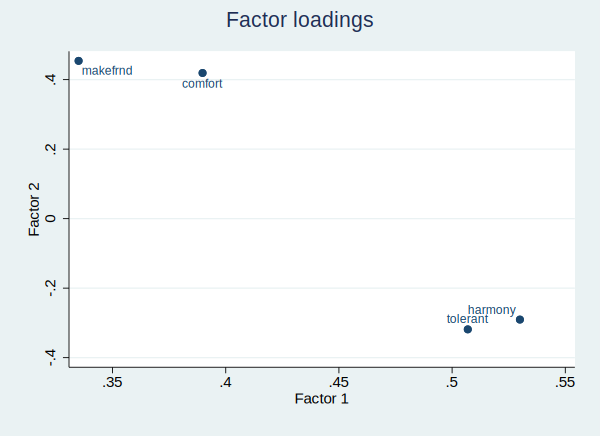

In [6]:
factor comfort makefrnd harmony tolerant
loadingplot, norotated

### Rotating the factor loading adjusts our factor loads to be positive:

* Positive factor loads are easier to interpret
* Variables for religion promotes a) Tolerant and b) harmony have high factor loading values on Factor 1 but low factor loading values on Factor 2
* Variables for religion promotes c) friendship and d) comfort variables have high factor loading values on Factor 2 but low factor loading values on Factor 1:




Factor analysis/correlation                      Number of obs    =      1,126
    Method: principal factors                    Retained factors =          2
    Rotation: orthogonal varimax (Kaiser off)    Number of params =          6

    --------------------------------------------------------------------------
         Factor  |     Variance   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      0.72569      0.08179            0.8286       0.8286
        Factor2  |      0.64390            .            0.7352       1.5638
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(6)  =  558.79 Prob>chi2 = 0.0000

Rotated factor loadings (pattern matrix) and unique variances

    -------------------------------------------------
        Variable |  Factor1   Factor2 |   Uniqueness 
    -------------+--------------------+----

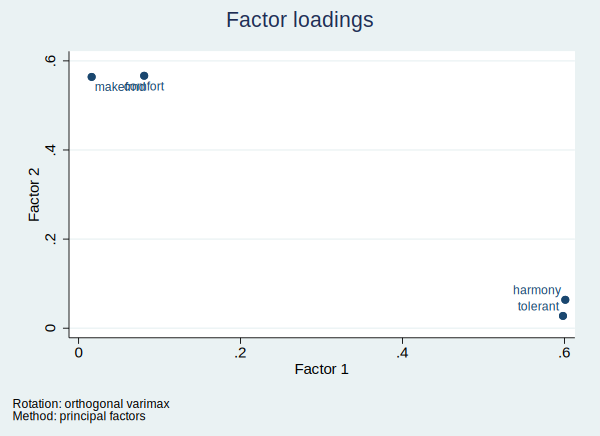

In [7]:
quietly factor comfort makefrnd harmony tolerant
rotate, varimax
loadingplot

### Generate scale variables:

Based on the factor analysis:

* Tolerance and harmony variables are correlated and make sense to combine in a scale.
* I'm going to call the tolerance/harmony scale variable **society** because the component variables measure beliefs about the benefits of religion to society
* I'm going to call the friend/comfort variables **individual** because they measure beliefs about the benefits of religion to individuals
* In both cases, I just calculate the mean of the two component variables:

In [8]:
gen individual=(makefrnd+comfort)/2
gen society=(harmony+tolerant)/2


(1,192 missing values generated)

(1,212 missing values generated)


### Abortion factor analysis and scales

* The following code replicates Treiman's factor analysis of abortion beliefs
* It constructs two scales for support of abortion in **therapeutic** cases and in **personal preference** cases





Factor analysis/correlation                      Number of obs    =      1,386
    Method: principal factors                    Retained factors =          2
    Rotation: orthogonal varimax (Kaiser off)    Number of params =         13

    --------------------------------------------------------------------------
         Factor  |     Variance   Difference        Proportion   Cumulative
    -------------+------------------------------------------------------------
        Factor1  |      3.15600      1.73613            0.7609       0.7609
        Factor2  |      1.41986            .            0.3423       1.1033
    --------------------------------------------------------------------------
    LR test: independent vs. saturated:  chi2(21) = 6374.10 Prob>chi2 = 0.0000

Rotated factor loadings (pattern matrix) and unique variances

    -------------------------------------------------
        Variable |  Factor1   Factor2 |   Uniqueness 
    -------------+--------------------+---

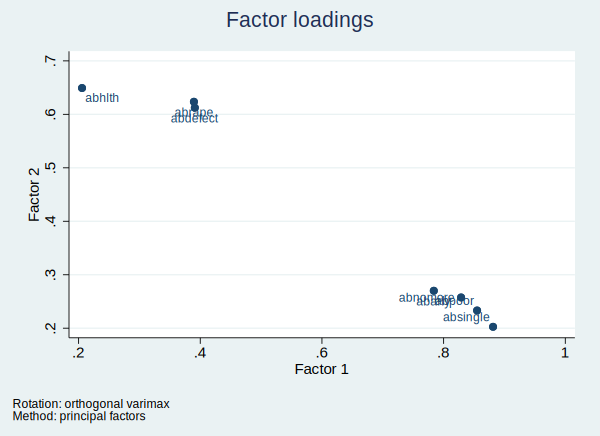




(884 missing values generated)

(905 missing values generated)


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
    personal |      1,464    .5015369    .4567292          0          1
 therapeutic |      1,443    .1704782    .3089263          0          1


In [9]:
foreach var in abdefect abnomore abhlth abpoor abrape absingle abany {
quietly replace `var'=`var'-1
}
quietly factor abdefect abnomore abhlth abpoor abrape absingle abany
rotate, varimax
loadingplot
gen personal=(abnomore+abpoor+absingle+abany)/4
gen therapeutic=(abdefect+abhlth+abrape)/3
sum personal therapeutic

### Standardizing religion and abortion scales

* The following code standardizes the religion and abortion scales
* Following Treiman, I standardize each scale to range from 0 to 1

In [13]:
foreach var in individual society makefrnd comfort harmony tolerant {
quietly replace `var'=`var'-1
quietly replace `var'=`var'/4 if `var'!=0
}
sum individual society society makefrnd comfort harmony tolerant


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
  individual |      1,156    .2308607    .1659576          0          1
     society |      1,136     .618728    .2300444          0          1
     society |      1,136     .618728    .2300444          0          1
    makefrnd |      1,157    .2945117    .2229436          0          1
     comfort |      1,162     .167599    .1667896          0          1
-------------+---------------------------------------------------------
     harmony |      1,144    .5981206    .2785311          0          1
    tolerant |      1,157    .6367761    .2558446          0          1


### 4. Regression and scale testing

* Good reliability tests of scales are as dependent (DV) and independent (IV) variables in regression models
* The direction of regression coefficients for scales should be the same as for their components
* E.g. the following regresses the abortion (DVs) on on the two religion scales (IVs) in models 1 & 2 and on the component parts of the religion scales (IVs) in models 3 and 4
* Are all of the regression coefficients of the component parts in the same direction?
* What does this reveal about differences in influence on types of abortion supported (DVs) of the individual vs society beliefs about religion?

In [11]:
quietly {
est clear
eststo: regress personal individual society age i.sex i.race educ, ro
eststo: regress therapeutic individual society age i.sex i.race educ, ro
eststo: regress personal makefrnd comfort harmony tolerant age i.sex i.race educ, ro
eststo: regress therapeutic makefrnd comfort harmony tolerant age i.sex i.race educ, ro
}
esttab ///
, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
	legend starlevels(^ .1 * .05 ** .01 *** .001) ///
mlabels("personal" "therapeutic" "personal" "therapeutic") ///
collabels(none) keep(individual society makefrnd comfort harmony tolerant)



. esttab , stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) se(fmt(2) par)) stardetach   legend starlevels(^ .1 * .05 ** .01 *** .001) mlabels("personal" "therapeutic" "personal" "therapeutic
> ") collabels(none) keep(individual society makefrnd comfort harmony tolerant)

--------------------------------------------------------------------------------
                      (1)              (2)              (3)              (4)    
                 personal      therapeutic         personal      therapeutic    
--------------------------------------------------------------------------------
individual          -0.10            -0.17 **                                   
                   (0.11)           (0.06)                                      
society             -0.34 ***        -0.21 ***                                  
                   (0.07)           (0.05)                                      
makefrnd                                               0.00         

### Also regress the component parts of dependent variable (DV) scales

* In this case, the component parts of the abortion scale were dichotomous indicator variables
* So we should use logistic regression:

In [16]:
est clear
quietly {
foreach var in abnomore abpoor absingle abany abdefect abhlth abrape {
eststo: logistic `var' individual society age sex race educ, ro
    }
    }
esttab ///
, stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) se(fmt(2) par)) stardetach  ///
	legend starlevels(^ .1 * .05 ** .01 *** .001) ///
mlabels("no more kids" "poor" "single" "any reason" "birth defect" "mom health" "rape") ///
collabels(none) drop(age sex race educ _cons)




. esttab , stats(r2 N, labels("R-Sqaured" "N")) cells(b(star fmt(2)) se(fmt(2) par)) stardetach   legend starlevels(^ .1 * .05 ** .01 *** .001) mlabels("no more kids" "poor" "single" "any reason" "bir
> th defect" "mom health" "rape") collabels(none) drop(age sex race educ _cons)

-----------------------------------------------------------------------------------------------------------------------------------
                      (1)              (2)              (3)              (4)              (5)              (6)              (7)    
             no more kids             poor           single       any reason     birth defect       mom health             rape    
-----------------------------------------------------------------------------------------------------------------------------------
main                                                                                                                               
individual          -0.88 ^          -0.59            -